<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 180.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 191.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 118.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 136.3 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head(2))
df.shape

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   

                                        EdLevel  \
0                     Primary/elementary school   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical

(65457, 114)

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
## Write your code here
print("Number of duplicate rows : ", df.duplicated().sum())
print("Number of duplicate rows : ", len(df)-len(df.drop_duplicates()))

print(df[df.duplicated()].head(2))

Number of duplicate rows :  20
Number of duplicate rows :  20
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   

                                            EdLevel  \
65437                     Primary/elementary school   
65438  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                               LearnCode  \
65437                             Books / Physical media   
65438  Books / Physical media;Colleague;On the job tr...   

                                         L

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [54]:
## Write your code here
#Duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork
dupRowsBasedon3cols= df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'])]
print("Duplicate rows count based on the columns MainBranch, Employment, and RemoteWork are: ", df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork']).sum())

#Columns frequently contain identical values within the abpve duplicate rows.
duplicate_columns = df[df.duplicated(['MainBranch', 'Employment', 'RemoteWork'])].apply(lambda row: row.unique(), axis=0)
print("Columns frequently contain identical values within these duplicate rows:")
print(duplicate_columns)



Duplicate rows count based on the columns MainBranch, Employment, and RemoteWork are:  64896
Columns frequently contain identical values within these duplicate rows:
ResponseId             [2, 3, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26,...
MainBranch             [I am a developer by profession, I code primar...
Age                    [35-44 years old, 45-54 years old, 25-34 years...
Employment             [Employed, full-time, Student, full-time, Inde...
RemoteWork             [Remote, Hybrid (some remote, some in-person),...
                                             ...                        
JobSatPoints_11        [0.0, nan, 10.0, 25.0, 5.0, 80.0, 50.0, 90.0, ...
SurveyLength           [nan, Appropriate in length, Too short, Too long]
SurveyEase             [nan, Easy, Neither easy nor difficult, Diffic...
ConvertedCompYearly    [nan, 30074.0, 91295.0, 53703.0, 110000.0, 161...
JobSat                 [nan, 5.0, 10.0, 9.0, 7.0, 6.0, 3.0, 8.0, 4.0,...
Length: 114, dtype: object


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


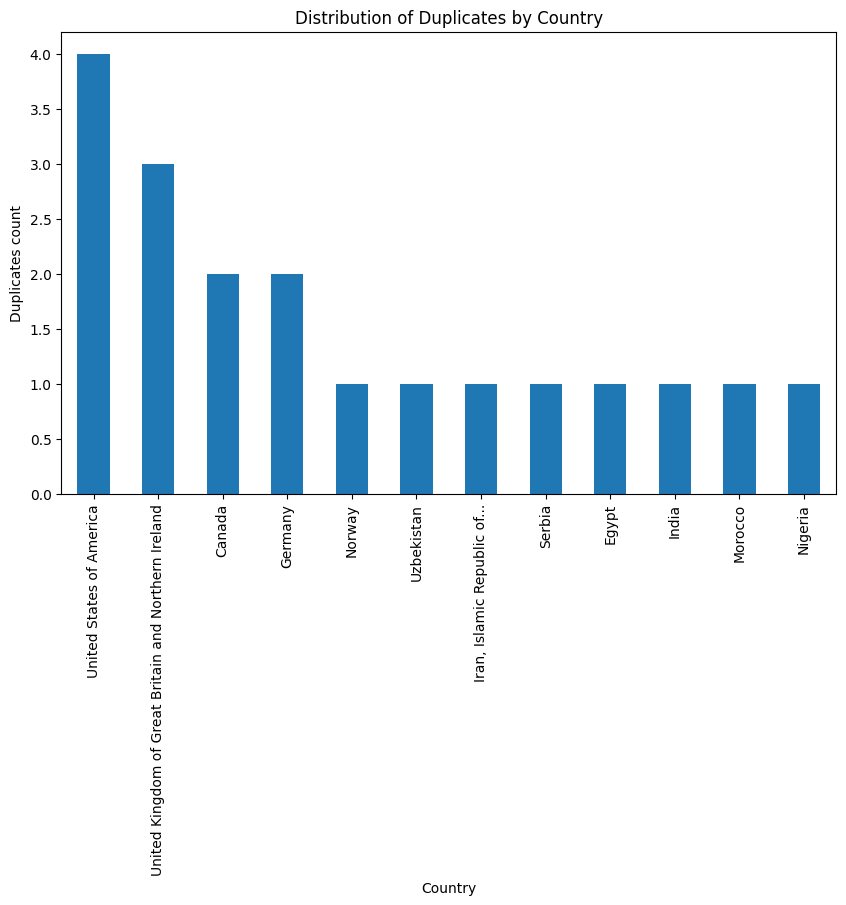

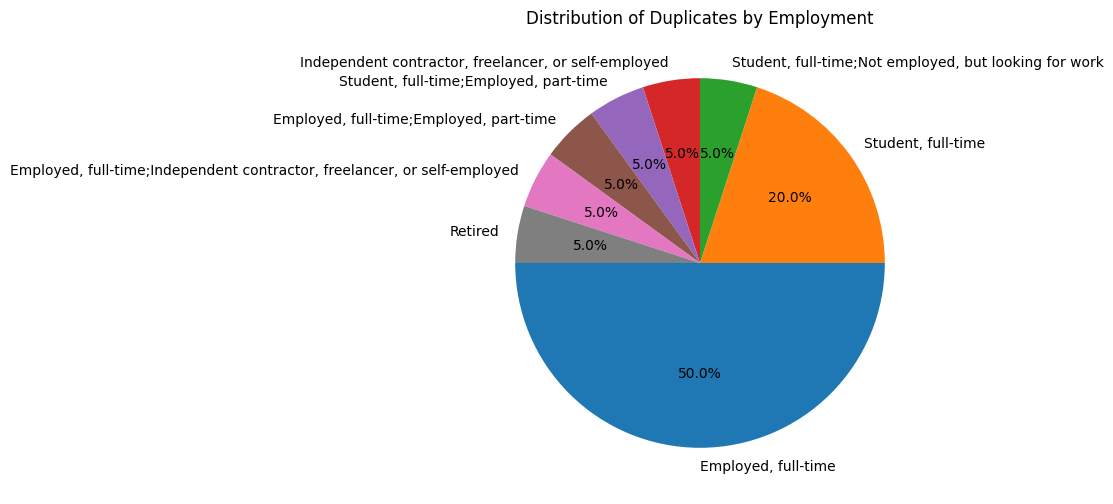

In [23]:
## Write your code here
#Distribution of duplicates by Country using Bar chart
DistByCountry=df[df.duplicated()]['Country'].value_counts()
plt.figure(figsize=(10,6))
DistByCountry.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Duplicates count')
plt.title('Distribution of Duplicates by Country')
plt.show()


#Distribution of duplicates by Employment using Pie chart
DistByEmployment=df[df.duplicated()]['Employment'].value_counts()
plt.figure(figsize=(10,6))
DistByEmployment.plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.ylabel('')
plt.title('Distribution of Duplicates by Employment')
plt.show()



### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [27]:
## Write your code here
#Decide which columns are critical for defining uniqueness in the dataset.
Cols_Subset = ['ResponseId','MainBranch', 'Age', 'Employment', 'DevType', 'Country']

#Remove duplicates based on a subset of columns
df_unique = df.drop_duplicates(subset=Cols_Subset)
#Rows count after removing duplicates
df_unique.shape[0]


65437

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
